___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [2]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [9]:
df.shape

(10000, 14)

In [10]:
df.isnull().sum().any()

False

In [11]:
df.duplicated().sum()

0

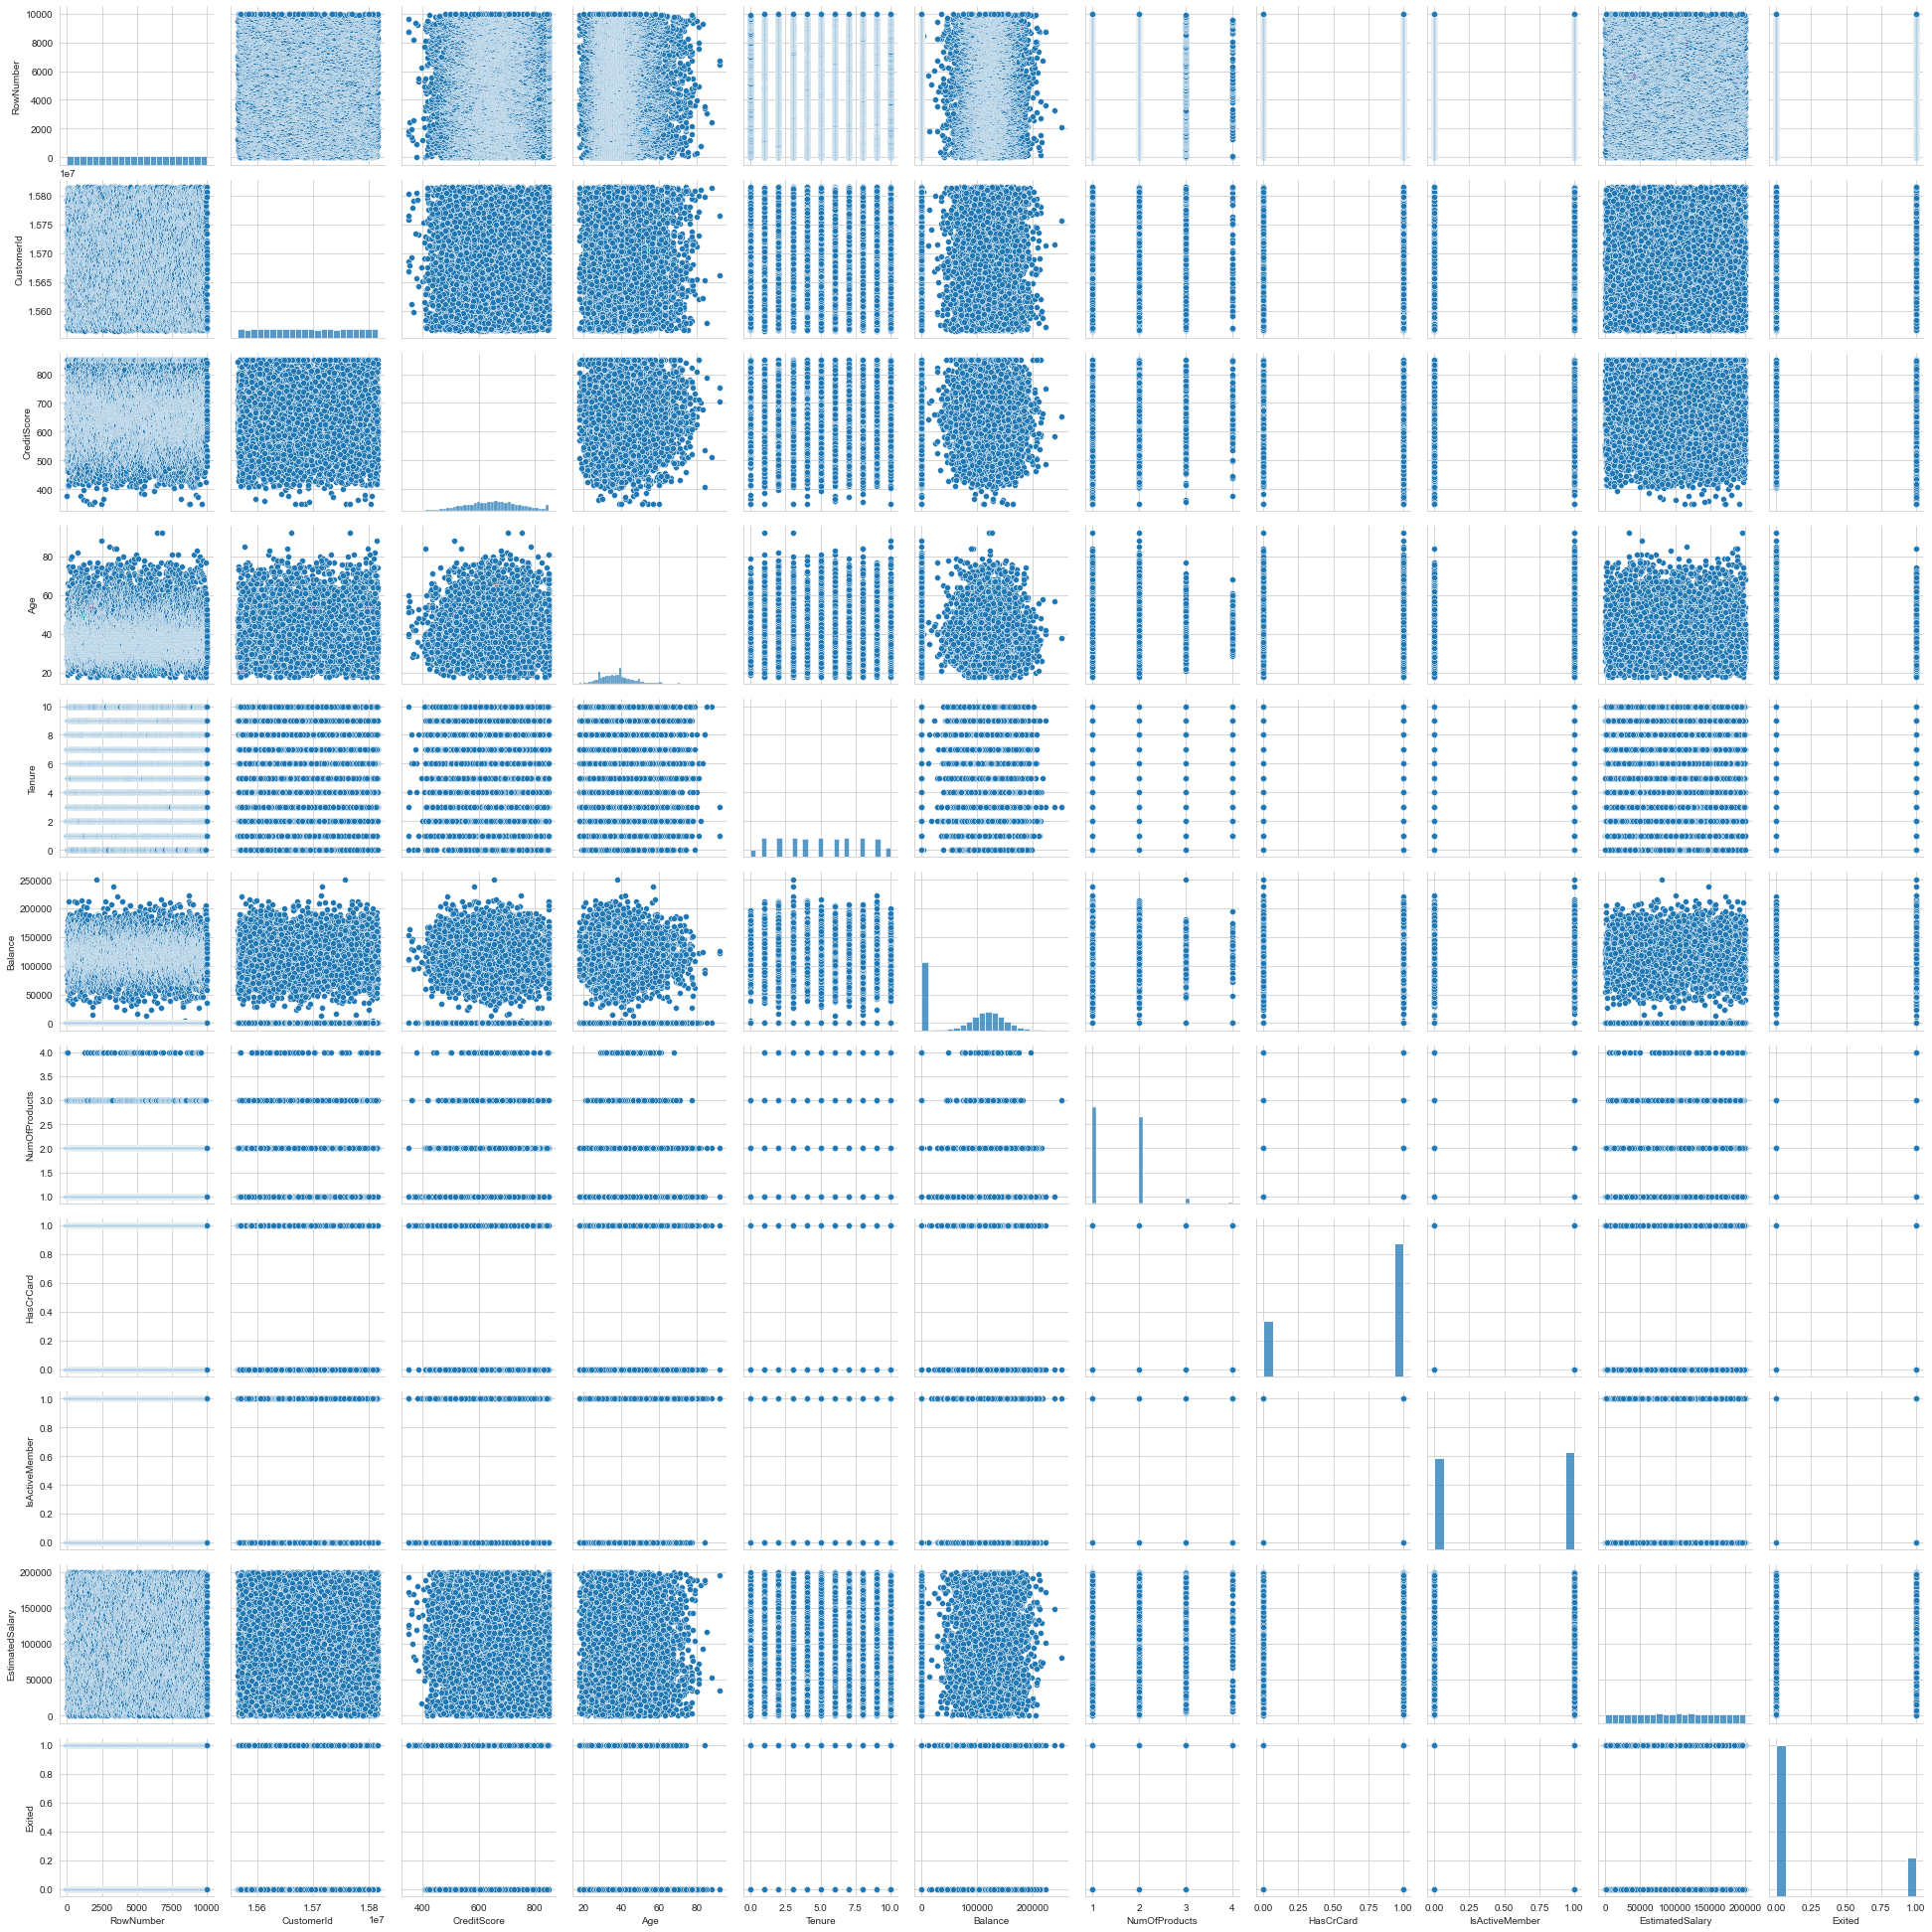

In [12]:
sns.pairplot(df);

In [13]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000,0.004,0.006,0.001,-0.006,-0.009,0.007,0.001,0.012,-0.006,-0.017
CustomerId,0.004,1.000,0.005,0.009,-0.015,-0.012,0.017,-0.014,0.002,0.015,-0.006
CreditScore,0.006,0.005,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,0.001,0.009,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,-0.006,-0.015,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,-0.009,-0.012,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.007,0.017,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,0.001,-0.014,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.012,0.002,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.006,0.015,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


In [14]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

0    7963
1    2037
Name: Exited, dtype: int64


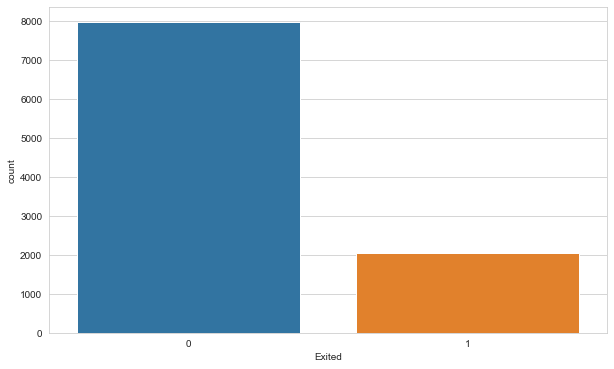

In [15]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

In [16]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,2,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,3,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,4,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,5,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [26]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [27]:
seed = 42

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [31]:
X_train.shape

(9000, 12)

In [32]:
X_test.shape

(1000, 12)

In [33]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [34]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5068 - accuracy: 0.7893 - val_loss: 0.4540 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.7969 - val_loss: 0.4285 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8110 - val_loss: 0.4000 - val_accuracy: 0.8289
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8173 - val_loss: 0.3791 - val_accuracy: 0.8567
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8252 - val_loss: 0.3596 - val_accuracy: 0.8567
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8354 - val_loss: 0.3369 - val_accuracy: 0.8744
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8458 - val_loss: 0.3236 - val_accuracy:

254/254 [==============================] - 1s 2ms/step - loss: 0.3199 - accuracy: 0.8651 - val_loss: 0.2917 - val_accuracy: 0.8856
Epoch 58/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8664 - val_loss: 0.2957 - val_accuracy: 0.8822
Epoch 59/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8681 - val_loss: 0.2945 - val_accuracy: 0.8844
Epoch 60/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.8694 - val_loss: 0.2978 - val_accuracy: 0.8789
Epoch 61/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8702 - val_loss: 0.2932 - val_accuracy: 0.8789
Epoch 62/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8695 - val_loss: 0.2972 - val_accuracy: 0.8800
Epoch 63/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8706 - val_loss: 0.3073 - val_accuracy: 0.8822

254/254 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8743 - val_loss: 0.3144 - val_accuracy: 0.8856
Epoch 114/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8730 - val_loss: 0.3033 - val_accuracy: 0.8878
Epoch 115/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8751 - val_loss: 0.3057 - val_accuracy: 0.8800
Epoch 116/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8759 - val_loss: 0.3011 - val_accuracy: 0.8878
Epoch 117/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8754 - val_loss: 0.3116 - val_accuracy: 0.8789
Epoch 118/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8737 - val_loss: 0.3055 - val_accuracy: 0.8867
Epoch 119/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8751 - val_loss: 0.3078 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8817 - val_loss: 0.3148 - val_accuracy: 0.8867
Epoch 170/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2923 - accuracy: 0.8793 - val_loss: 0.3267 - val_accuracy: 0.8800
Epoch 171/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2912 - accuracy: 0.8781 - val_loss: 0.3197 - val_accuracy: 0.8800
Epoch 172/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2914 - accuracy: 0.8809 - val_loss: 0.3204 - val_accuracy: 0.8711
Epoch 173/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2910 - accuracy: 0.8790 - val_loss: 0.3127 - val_accuracy: 0.8844
Epoch 174/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2914 - accuracy: 0.8799 - val_loss: 0.3135 - val_accuracy: 0.8778
Epoch 175/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2896 - accuracy: 0.8798 - val_loss: 0.3196 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.8830 - val_loss: 0.3226 - val_accuracy: 0.8822
Epoch 226/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.8867 - val_loss: 0.3238 - val_accuracy: 0.8778
Epoch 227/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8852 - val_loss: 0.3192 - val_accuracy: 0.8756
Epoch 228/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.8854 - val_loss: 0.3249 - val_accuracy: 0.8711
Epoch 229/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.8847 - val_loss: 0.3243 - val_accuracy: 0.8778
Epoch 230/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.8872 - val_loss: 0.3230 - val_accuracy: 0.8811
Epoch 231/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.8825 - val_loss: 0.3238 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.8868 - val_loss: 0.3370 - val_accuracy: 0.8711
Epoch 282/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2734 - accuracy: 0.8878 - val_loss: 0.3287 - val_accuracy: 0.8722
Epoch 283/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8873 - val_loss: 0.3309 - val_accuracy: 0.8789
Epoch 284/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8858 - val_loss: 0.3404 - val_accuracy: 0.8733
Epoch 285/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.8883 - val_loss: 0.3321 - val_accuracy: 0.8722
Epoch 286/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.8868 - val_loss: 0.3392 - val_accuracy: 0.8733
Epoch 287/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2708 - accuracy: 0.8893 - val_loss: 0.3310 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.8895 - val_loss: 0.3503 - val_accuracy: 0.8722
Epoch 338/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8936 - val_loss: 0.3524 - val_accuracy: 0.8678
Epoch 339/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.8911 - val_loss: 0.3498 - val_accuracy: 0.8789
Epoch 340/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2628 - accuracy: 0.8941 - val_loss: 0.3562 - val_accuracy: 0.8600
Epoch 341/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2640 - accuracy: 0.8920 - val_loss: 0.3438 - val_accuracy: 0.8733
Epoch 342/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.8932 - val_loss: 0.3396 - val_accuracy: 0.8767
Epoch 343/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.8912 - val_loss: 0.3488 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.8954 - val_loss: 0.3665 - val_accuracy: 0.8656
Epoch 394/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.8949 - val_loss: 0.3595 - val_accuracy: 0.8667
Epoch 395/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8946 - val_loss: 0.3633 - val_accuracy: 0.8767
Epoch 396/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.8944 - val_loss: 0.3681 - val_accuracy: 0.8711
Epoch 397/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.8927 - val_loss: 0.3710 - val_accuracy: 0.8633
Epoch 398/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8960 - val_loss: 0.3649 - val_accuracy: 0.8644
Epoch 399/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8948 - val_loss: 0.3622 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.8973 - val_loss: 0.3822 - val_accuracy: 0.8600
Epoch 450/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.8942 - val_loss: 0.3850 - val_accuracy: 0.8700
Epoch 451/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.8933 - val_loss: 0.3816 - val_accuracy: 0.8611
Epoch 452/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2550 - accuracy: 0.8927 - val_loss: 0.3924 - val_accuracy: 0.8611
Epoch 453/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.8962 - val_loss: 0.3944 - val_accuracy: 0.8644
Epoch 454/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.8951 - val_loss: 0.3912 - val_accuracy: 0.8567
Epoch 455/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.8984 - val_loss: 0.3896 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.8977 - val_loss: 0.3899 - val_accuracy: 0.8756
Epoch 506/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8985 - val_loss: 0.4109 - val_accuracy: 0.8544
Epoch 507/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.9010 - val_loss: 0.4041 - val_accuracy: 0.8644
Epoch 508/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.8974 - val_loss: 0.4122 - val_accuracy: 0.8422
Epoch 509/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.8984 - val_loss: 0.3986 - val_accuracy: 0.8589
Epoch 510/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.8963 - val_loss: 0.4089 - val_accuracy: 0.8589
Epoch 511/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.8962 - val_loss: 0.4026 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.2426 - accuracy: 0.8995 - val_loss: 0.4212 - val_accuracy: 0.8522
Epoch 562/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9002 - val_loss: 0.4142 - val_accuracy: 0.8611
Epoch 563/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.8985 - val_loss: 0.4027 - val_accuracy: 0.8600
Epoch 564/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2392 - accuracy: 0.9022 - val_loss: 0.4312 - val_accuracy: 0.8633
Epoch 565/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.8990 - val_loss: 0.4142 - val_accuracy: 0.8622
Epoch 566/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2400 - accuracy: 0.9027 - val_loss: 0.4225 - val_accuracy: 0.8611
Epoch 567/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.8999 - val_loss: 0.4074 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9030 - val_loss: 0.4360 - val_accuracy: 0.8611
Epoch 618/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9021 - val_loss: 0.4431 - val_accuracy: 0.8533
Epoch 619/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.8986 - val_loss: 0.4238 - val_accuracy: 0.8533
Epoch 620/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.9007 - val_loss: 0.4372 - val_accuracy: 0.8522
Epoch 621/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9030 - val_loss: 0.4356 - val_accuracy: 0.8567
Epoch 622/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9031 - val_loss: 0.4250 - val_accuracy: 0.8644
Epoch 623/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9028 - val_loss: 0.4857 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.2306 - accuracy: 0.9031 - val_loss: 0.4759 - val_accuracy: 0.8489
Epoch 674/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9032 - val_loss: 0.4654 - val_accuracy: 0.8611
Epoch 675/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.8994 - val_loss: 0.4523 - val_accuracy: 0.8544
Epoch 676/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2293 - accuracy: 0.9053 - val_loss: 0.4703 - val_accuracy: 0.8511
Epoch 677/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9065 - val_loss: 0.4592 - val_accuracy: 0.8578
Epoch 678/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9047 - val_loss: 0.4603 - val_accuracy: 0.8578
Epoch 679/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9037 - val_loss: 0.4678 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.9077 - val_loss: 0.4871 - val_accuracy: 0.8567
Epoch 730/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.9070 - val_loss: 0.4793 - val_accuracy: 0.8611
Epoch 731/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2288 - accuracy: 0.9041 - val_loss: 0.4738 - val_accuracy: 0.8644
Epoch 732/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9075 - val_loss: 0.4762 - val_accuracy: 0.8622
Epoch 733/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9069 - val_loss: 0.4933 - val_accuracy: 0.8589
Epoch 734/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9044 - val_loss: 0.4997 - val_accuracy: 0.8467
Epoch 735/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9075 - val_loss: 0.4763 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9070 - val_loss: 0.5156 - val_accuracy: 0.8567
Epoch 786/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9085 - val_loss: 0.5071 - val_accuracy: 0.8533
Epoch 787/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2244 - accuracy: 0.9080 - val_loss: 0.4878 - val_accuracy: 0.8611
Epoch 788/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9101 - val_loss: 0.5034 - val_accuracy: 0.8533
Epoch 789/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9064 - val_loss: 0.5065 - val_accuracy: 0.8567
Epoch 790/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9048 - val_loss: 0.5315 - val_accuracy: 0.8656
Epoch 791/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9060 - val_loss: 0.5069 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9089 - val_loss: 0.5390 - val_accuracy: 0.8533
Epoch 842/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9120 - val_loss: 0.5282 - val_accuracy: 0.8600
Epoch 843/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9074 - val_loss: 0.5334 - val_accuracy: 0.8556
Epoch 844/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9109 - val_loss: 0.5244 - val_accuracy: 0.8500
Epoch 845/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9098 - val_loss: 0.5254 - val_accuracy: 0.8522
Epoch 846/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9098 - val_loss: 0.5588 - val_accuracy: 0.8522
Epoch 847/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9090 - val_loss: 0.5192 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9133 - val_loss: 0.5225 - val_accuracy: 0.8589
Epoch 898/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9084 - val_loss: 0.5279 - val_accuracy: 0.8556
Epoch 899/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2179 - accuracy: 0.9110 - val_loss: 0.5580 - val_accuracy: 0.8500
Epoch 900/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9106 - val_loss: 0.5551 - val_accuracy: 0.8478
Epoch 901/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.9109 - val_loss: 0.5380 - val_accuracy: 0.8556
Epoch 902/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9115 - val_loss: 0.5754 - val_accuracy: 0.8478
Epoch 903/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9119 - val_loss: 0.5352 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9111 - val_loss: 0.5338 - val_accuracy: 0.8444
Epoch 954/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9123 - val_loss: 0.5845 - val_accuracy: 0.8444
Epoch 955/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9163 - val_loss: 0.5501 - val_accuracy: 0.8556
Epoch 956/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9111 - val_loss: 0.5762 - val_accuracy: 0.8489
Epoch 957/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9119 - val_loss: 0.5910 - val_accuracy: 0.8556
Epoch 958/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.9078 - val_loss: 0.5552 - val_accuracy: 0.8511
Epoch 959/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9128 - val_loss: 0.5647 - val_accuracy: 

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                468       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [36]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.507,0.789,0.454,0.799
1,0.459,0.797,0.429,0.799
2,0.437,0.811,0.400,0.829
3,0.418,0.817,0.379,0.857
4,0.402,0.825,0.360,0.857


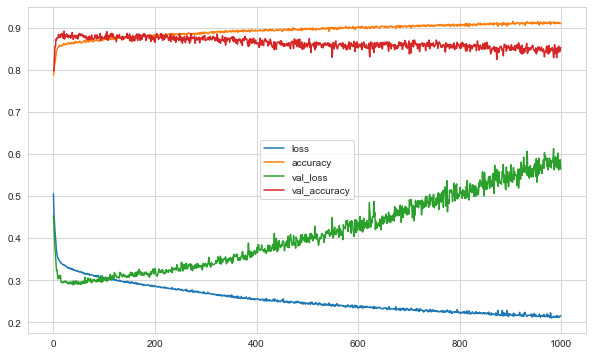

In [37]:
loss_df.plot();

In [38]:
model.evaluate(X_test, y_test, verbose=0)

[0.5725555419921875, 0.8339999914169312]

In [39]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5725555419921875
accuracy :  0.8339999914169312


In [40]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[741  55]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       796
           1       0.63      0.46      0.53       204

    accuracy                           0.83      1000
   macro avg       0.75      0.69      0.71      1000
weighted avg       0.82      0.83      0.82      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [41]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [42]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [43]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4677 - accuracy: 0.7963 - val_loss: 0.4199 - val_accuracy: 0.8278
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8191 - val_loss: 0.3453 - val_accuracy: 0.8644
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8451 - val_loss: 0.3272 - val_accuracy: 0.8767
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8501 - val_loss: 0.3158 - val_accuracy: 0.8789
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8484 - val_loss: 0.3141 - val_accuracy: 0.8711
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8510 - val_loss: 0.2998 - val_accuracy: 0.8833
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8509 - val_loss: 0.3032 - val_accuracy:

<AxesSubplot:>

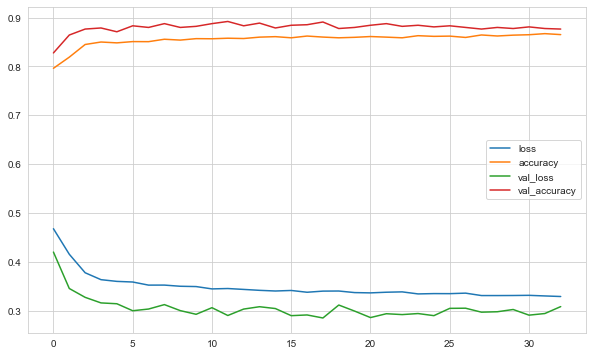

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3421425521373749
accuracy :  0.8669999837875366


In [46]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[760  36]
 [ 97 107]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       796
           1       0.75      0.52      0.62       204

    accuracy                           0.87      1000
   macro avg       0.82      0.74      0.77      1000
weighted avg       0.86      0.87      0.86      1000



### Add Dropout Layer

In [47]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8636 - val_loss: 0.3007 - val_accuracy: 0.8811
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8631 - val_loss: 0.2988 - val_accuracy: 0.8778
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8643 - val_loss: 0.3006 - val_accuracy: 0.8800
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8611 - val_loss: 0.2944 - val_accuracy: 0.8800
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8596 - val_loss: 0.3021 - val_accuracy: 0.8811
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8604 - val_loss: 0.2904 - val_accuracy: 0.8844
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8659 - val_loss: 0.2988 - val_accuracy:

254/254 [==============================] - 1s 2ms/step - loss: 0.3091 - accuracy: 0.8709 - val_loss: 0.3134 - val_accuracy: 0.8844
Epoch 58/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3090 - accuracy: 0.8719 - val_loss: 0.3183 - val_accuracy: 0.8744
Epoch 59/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3078 - accuracy: 0.8712 - val_loss: 0.3227 - val_accuracy: 0.8767
Epoch 60/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8740 - val_loss: 0.3262 - val_accuracy: 0.8744
Epoch 61/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8737 - val_loss: 0.3103 - val_accuracy: 0.8778
Epoch 62/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8732 - val_loss: 0.3107 - val_accuracy: 0.8844
Epoch 63/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8720 - val_loss: 0.3205 - val_accuracy: 0.8789

254/254 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.8796 - val_loss: 0.3477 - val_accuracy: 0.8722
Epoch 114/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8798 - val_loss: 0.3363 - val_accuracy: 0.8856
Epoch 115/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8790 - val_loss: 0.3413 - val_accuracy: 0.8756
Epoch 116/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8785 - val_loss: 0.3267 - val_accuracy: 0.8833
Epoch 117/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.8822 - val_loss: 0.3392 - val_accuracy: 0.8756
Epoch 118/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8823 - val_loss: 0.3411 - val_accuracy: 0.8733
Epoch 119/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8786 - val_loss: 0.3462 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.2753 - accuracy: 0.8830 - val_loss: 0.3698 - val_accuracy: 0.8678
Epoch 170/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2826 - accuracy: 0.8795 - val_loss: 0.3921 - val_accuracy: 0.8689
Epoch 171/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2724 - accuracy: 0.8835 - val_loss: 0.3954 - val_accuracy: 0.8700
Epoch 172/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2723 - accuracy: 0.8832 - val_loss: 0.3771 - val_accuracy: 0.8711
Epoch 173/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2721 - accuracy: 0.8859 - val_loss: 0.4046 - val_accuracy: 0.8644
Epoch 174/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2771 - accuracy: 0.8835 - val_loss: 0.3746 - val_accuracy: 0.8789
Epoch 175/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2718 - accuracy: 0.8856 - val_loss: 0.3856 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.8888 - val_loss: 0.4174 - val_accuracy: 0.8611
Epoch 226/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2628 - accuracy: 0.8902 - val_loss: 0.4334 - val_accuracy: 0.8700
Epoch 227/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2661 - accuracy: 0.8896 - val_loss: 0.4067 - val_accuracy: 0.8667
Epoch 228/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2678 - accuracy: 0.8847 - val_loss: 0.3988 - val_accuracy: 0.8656
Epoch 229/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2630 - accuracy: 0.8885 - val_loss: 0.4307 - val_accuracy: 0.8622
Epoch 230/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2654 - accuracy: 0.8867 - val_loss: 0.4131 - val_accuracy: 0.8700
Epoch 231/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.8891 - val_loss: 0.4102 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.8896 - val_loss: 0.4760 - val_accuracy: 0.8711
Epoch 282/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.8906 - val_loss: 0.4933 - val_accuracy: 0.8600
Epoch 283/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8891 - val_loss: 0.4588 - val_accuracy: 0.8722
Epoch 284/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.8905 - val_loss: 0.4855 - val_accuracy: 0.8667
Epoch 285/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.8925 - val_loss: 0.4680 - val_accuracy: 0.8733
Epoch 286/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.8899 - val_loss: 0.4535 - val_accuracy: 0.8778
Epoch 287/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.8906 - val_loss: 0.4520 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.8921 - val_loss: 0.5209 - val_accuracy: 0.8667
Epoch 338/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.8923 - val_loss: 0.4952 - val_accuracy: 0.8733
Epoch 339/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8927 - val_loss: 0.5062 - val_accuracy: 0.8700
Epoch 340/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.8943 - val_loss: 0.4937 - val_accuracy: 0.8656
Epoch 341/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.8956 - val_loss: 0.4941 - val_accuracy: 0.8667
Epoch 342/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8941 - val_loss: 0.4954 - val_accuracy: 0.8744
Epoch 343/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.8906 - val_loss: 0.5145 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8956 - val_loss: 0.5424 - val_accuracy: 0.8678
Epoch 394/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.8968 - val_loss: 0.5102 - val_accuracy: 0.8600
Epoch 395/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.8981 - val_loss: 0.5514 - val_accuracy: 0.8667
Epoch 396/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.8980 - val_loss: 0.5463 - val_accuracy: 0.8667
Epoch 397/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.8954 - val_loss: 0.5324 - val_accuracy: 0.8656
Epoch 398/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.8959 - val_loss: 0.5342 - val_accuracy: 0.8611
Epoch 399/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.8948 - val_loss: 0.5326 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.8930 - val_loss: 0.5486 - val_accuracy: 0.8578
Epoch 450/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.8956 - val_loss: 0.5343 - val_accuracy: 0.8656
Epoch 451/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.8958 - val_loss: 0.5468 - val_accuracy: 0.8656
Epoch 452/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2383 - accuracy: 0.8968 - val_loss: 0.5568 - val_accuracy: 0.8689
Epoch 453/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2405 - accuracy: 0.8980 - val_loss: 0.5634 - val_accuracy: 0.8622
Epoch 454/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.8968 - val_loss: 0.5369 - val_accuracy: 0.8656
Epoch 455/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2350 - accuracy: 0.9000 - val_loss: 0.5697 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.8970 - val_loss: 0.6446 - val_accuracy: 0.8711
Epoch 506/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.8983 - val_loss: 0.6235 - val_accuracy: 0.8589
Epoch 507/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2355 - accuracy: 0.8974 - val_loss: 0.6121 - val_accuracy: 0.8667
Epoch 508/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9002 - val_loss: 0.6048 - val_accuracy: 0.8656
Epoch 509/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.8999 - val_loss: 0.5723 - val_accuracy: 0.8678
Epoch 510/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.8962 - val_loss: 0.5677 - val_accuracy: 0.8667
Epoch 511/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.8993 - val_loss: 0.6258 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.8983 - val_loss: 0.6046 - val_accuracy: 0.8644
Epoch 562/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.8989 - val_loss: 0.6342 - val_accuracy: 0.8678
Epoch 563/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.8996 - val_loss: 0.6019 - val_accuracy: 0.8711
Epoch 564/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.8958 - val_loss: 0.5862 - val_accuracy: 0.8644
Epoch 565/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.8972 - val_loss: 0.5988 - val_accuracy: 0.8656
Epoch 566/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.8993 - val_loss: 0.5913 - val_accuracy: 0.8622
Epoch 567/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.9015 - val_loss: 0.6189 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9011 - val_loss: 0.6479 - val_accuracy: 0.8633
Epoch 618/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.8994 - val_loss: 0.6427 - val_accuracy: 0.8633
Epoch 619/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.8979 - val_loss: 0.6362 - val_accuracy: 0.8567
Epoch 620/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9001 - val_loss: 0.6797 - val_accuracy: 0.8722
Epoch 621/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.8990 - val_loss: 0.6877 - val_accuracy: 0.8667
Epoch 622/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.8989 - val_loss: 0.6426 - val_accuracy: 0.8611
Epoch 623/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.8985 - val_loss: 0.6177 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.8980 - val_loss: 0.6506 - val_accuracy: 0.8667
Epoch 674/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9015 - val_loss: 0.6468 - val_accuracy: 0.8622
Epoch 675/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9030 - val_loss: 0.6568 - val_accuracy: 0.8711
Epoch 676/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9016 - val_loss: 0.6605 - val_accuracy: 0.8644
Epoch 677/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.9010 - val_loss: 0.6513 - val_accuracy: 0.8689
Epoch 678/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9020 - val_loss: 0.6785 - val_accuracy: 0.8622
Epoch 679/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.8993 - val_loss: 0.6806 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.8981 - val_loss: 0.6367 - val_accuracy: 0.8633
Epoch 730/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.8993 - val_loss: 0.7255 - val_accuracy: 0.8600
Epoch 731/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9011 - val_loss: 0.7204 - val_accuracy: 0.8678
Epoch 732/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.8998 - val_loss: 0.6827 - val_accuracy: 0.8622
Epoch 733/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.9017 - val_loss: 0.7172 - val_accuracy: 0.8622
Epoch 734/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.8998 - val_loss: 0.6940 - val_accuracy: 0.8667
Epoch 735/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.9015 - val_loss: 0.6657 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9014 - val_loss: 0.7031 - val_accuracy: 0.8667
Epoch 786/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.9000 - val_loss: 0.7132 - val_accuracy: 0.8622
Epoch 787/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9004 - val_loss: 0.7159 - val_accuracy: 0.8544
Epoch 788/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9001 - val_loss: 0.7126 - val_accuracy: 0.8611
Epoch 789/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2288 - accuracy: 0.9011 - val_loss: 0.6866 - val_accuracy: 0.8589
Epoch 790/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9030 - val_loss: 0.7478 - val_accuracy: 0.8567
Epoch 791/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9040 - val_loss: 0.7202 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.8999 - val_loss: 0.7353 - val_accuracy: 0.8600
Epoch 842/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2214 - accuracy: 0.9025 - val_loss: 0.7305 - val_accuracy: 0.8600
Epoch 843/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.8978 - val_loss: 0.7633 - val_accuracy: 0.8611
Epoch 844/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2285 - accuracy: 0.9021 - val_loss: 0.7532 - val_accuracy: 0.8689
Epoch 845/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9001 - val_loss: 0.7532 - val_accuracy: 0.8633
Epoch 846/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9022 - val_loss: 0.7863 - val_accuracy: 0.8633
Epoch 847/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9044 - val_loss: 0.7950 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9012 - val_loss: 0.7959 - val_accuracy: 0.8633
Epoch 898/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9037 - val_loss: 0.7895 - val_accuracy: 0.8644
Epoch 899/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9014 - val_loss: 0.7329 - val_accuracy: 0.8622
Epoch 900/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9026 - val_loss: 0.7778 - val_accuracy: 0.8644
Epoch 901/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9032 - val_loss: 0.7716 - val_accuracy: 0.8633
Epoch 902/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9021 - val_loss: 0.7451 - val_accuracy: 0.8567
Epoch 903/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9036 - val_loss: 0.7857 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9040 - val_loss: 0.7735 - val_accuracy: 0.8656
Epoch 954/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9026 - val_loss: 0.8320 - val_accuracy: 0.8633
Epoch 955/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9062 - val_loss: 0.8260 - val_accuracy: 0.8622
Epoch 956/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2164 - accuracy: 0.9035 - val_loss: 0.8208 - val_accuracy: 0.8678
Epoch 957/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2204 - accuracy: 0.9020 - val_loss: 0.8350 - val_accuracy: 0.8578
Epoch 958/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2235 - accuracy: 0.9020 - val_loss: 0.8333 - val_accuracy: 0.8567
Epoch 959/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2178 - accuracy: 0.9022 - val_loss: 0.8627 - val_accuracy: 

<AxesSubplot:>

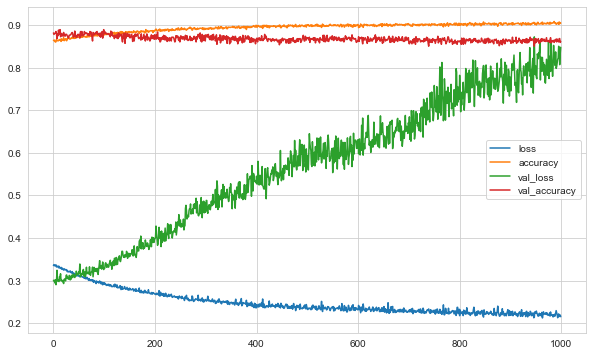

In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [49]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.977016031742096
accuracy :  0.8360000252723694


In [50]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[756  40]
 [124  80]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.67      0.39      0.49       204

    accuracy                           0.84      1000
   macro avg       0.76      0.67      0.70      1000
weighted avg       0.82      0.84      0.82      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [51]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [52]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [53]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5068 - accuracy: 0.7893 - val_loss: 0.4540 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.7969 - val_loss: 0.4285 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8110 - val_loss: 0.4000 - val_accuracy: 0.8289
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8173 - val_loss: 0.3791 - val_accuracy: 0.8567
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8252 - val_loss: 0.3596 - val_accuracy: 0.8567
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3852 - accuracy: 0.8354 - val_loss: 0.3369 - val_accuracy: 0.8744
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3706 - accuracy: 0.8458 - val_loss: 0.3236 - val_accuracy:

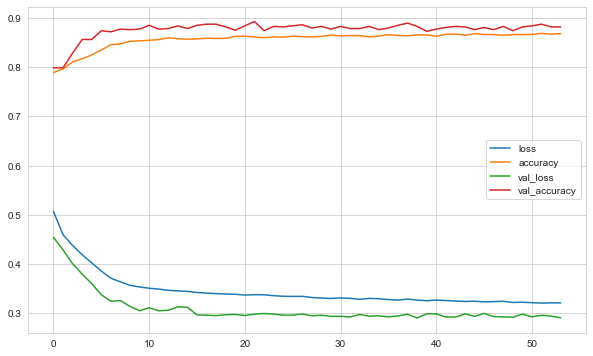

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [55]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33987006545066833
accuracy :  0.8619999885559082


In [56]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[770  26]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.78      0.45      0.57       204

    accuracy                           0.86      1000
   macro avg       0.83      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



#### Monitor the "val_recall" as metric

In [57]:
early_stop2 = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop2])

Epoch 1/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8646 - val_loss: 0.2917 - val_accuracy: 0.8811
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8642 - val_loss: 0.2942 - val_accuracy: 0.8778
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8675 - val_loss: 0.2939 - val_accuracy: 0.8733
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8656 - val_loss: 0.2930 - val_accuracy: 0.8822
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8656 - val_loss: 0.2969 - val_accuracy: 0.8756
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8651 - val_loss: 0.2933 - val_accuracy: 0.8867
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8637 - val_loss: 0.2916 - val_accuracy:

254/254 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8680 - val_loss: 0.2967 - val_accuracy: 0.8822
Epoch 23/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8679 - val_loss: 0.2970 - val_accuracy: 0.8744
Epoch 24/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8677 - val_loss: 0.2965 - val_accuracy: 0.8833
Epoch 25/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8677 - val_loss: 0.2961 - val_accuracy: 0.8800
Epoch 26/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8683 - val_loss: 0.2992 - val_accuracy: 0.8800
Epoch 27/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8667 - val_loss: 0.3009 - val_accuracy: 0.8856
Epoch 28/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8706 - val_loss: 0.2949 - val_accuracy: 0.8833

254/254 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8711 - val_loss: 0.3030 - val_accuracy: 0.8800
Epoch 45/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8716 - val_loss: 0.2969 - val_accuracy: 0.8778
Epoch 46/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8712 - val_loss: 0.3049 - val_accuracy: 0.8822
Epoch 47/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8715 - val_loss: 0.2964 - val_accuracy: 0.8744
Epoch 48/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8728 - val_loss: 0.2951 - val_accuracy: 0.8756
Epoch 49/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8721 - val_loss: 0.2959 - val_accuracy: 0.8778
Epoch 50/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8741 - val_loss: 0.3074 - val_accuracy: 0.8767

254/254 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8760 - val_loss: 0.3016 - val_accuracy: 0.8800
Epoch 66/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8756 - val_loss: 0.3039 - val_accuracy: 0.8800
Epoch 67/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8725 - val_loss: 0.2996 - val_accuracy: 0.8722
Epoch 68/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8722 - val_loss: 0.2998 - val_accuracy: 0.8778
Epoch 69/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8762 - val_loss: 0.3147 - val_accuracy: 0.8711
Epoch 70/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8757 - val_loss: 0.3078 - val_accuracy: 0.8756
Epoch 71/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8731 - val_loss: 0.3045 - val_accuracy: 0.8700

254/254 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8779 - val_loss: 0.3128 - val_accuracy: 0.8811
Epoch 88/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8748 - val_loss: 0.3066 - val_accuracy: 0.8833
Epoch 89/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8748 - val_loss: 0.3053 - val_accuracy: 0.8800
Epoch 90/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8756 - val_loss: 0.3045 - val_accuracy: 0.8822
Epoch 91/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8733 - val_loss: 0.3107 - val_accuracy: 0.8800
Epoch 92/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8798 - val_loss: 0.3048 - val_accuracy: 0.8800
Epoch 93/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8800 - val_loss: 0.3063 - val_accuracy: 0.8789

254/254 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.8781 - val_loss: 0.3144 - val_accuracy: 0.8789
Epoch 109/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8770 - val_loss: 0.3064 - val_accuracy: 0.8778
Epoch 110/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8774 - val_loss: 0.3098 - val_accuracy: 0.8867
Epoch 111/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8779 - val_loss: 0.3087 - val_accuracy: 0.8800
Epoch 112/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8728 - val_loss: 0.3097 - val_accuracy: 0.8744
Epoch 113/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8796 - val_loss: 0.3206 - val_accuracy: 0.8789
Epoch 114/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.8784 - val_loss: 0.3066 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8795 - val_loss: 0.3108 - val_accuracy: 0.8822
Epoch 131/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8812 - val_loss: 0.3113 - val_accuracy: 0.8844
Epoch 132/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8823 - val_loss: 0.3288 - val_accuracy: 0.8756
Epoch 133/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.8794 - val_loss: 0.3201 - val_accuracy: 0.8644
Epoch 134/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8815 - val_loss: 0.3238 - val_accuracy: 0.8644
Epoch 135/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2908 - accuracy: 0.8783 - val_loss: 0.3171 - val_accuracy: 0.8744
Epoch 136/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8798 - val_loss: 0.3121 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8794 - val_loss: 0.3226 - val_accuracy: 0.8778
Epoch 152/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8823 - val_loss: 0.3239 - val_accuracy: 0.8722
Epoch 153/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8822 - val_loss: 0.3298 - val_accuracy: 0.8700
Epoch 154/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8811 - val_loss: 0.3217 - val_accuracy: 0.8789
Epoch 155/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8796 - val_loss: 0.3257 - val_accuracy: 0.8678
Epoch 156/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8814 - val_loss: 0.3296 - val_accuracy: 0.8744
Epoch 157/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.8821 - val_loss: 0.3166 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8814 - val_loss: 0.3267 - val_accuracy: 0.8711
Epoch 174/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.8837 - val_loss: 0.3195 - val_accuracy: 0.8733
Epoch 175/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8832 - val_loss: 0.3248 - val_accuracy: 0.8733
Epoch 176/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8827 - val_loss: 0.3229 - val_accuracy: 0.8700
Epoch 177/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.8819 - val_loss: 0.3245 - val_accuracy: 0.8756
Epoch 178/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.8832 - val_loss: 0.3237 - val_accuracy: 0.8756
Epoch 179/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8833 - val_loss: 0.3265 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.2804 - accuracy: 0.8844 - val_loss: 0.3324 - val_accuracy: 0.8722
Epoch 195/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2792 - accuracy: 0.8867 - val_loss: 0.3338 - val_accuracy: 0.8722
Epoch 196/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2802 - accuracy: 0.8840 - val_loss: 0.3356 - val_accuracy: 0.8756
Epoch 197/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2808 - accuracy: 0.8856 - val_loss: 0.3500 - val_accuracy: 0.8633
Epoch 198/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2784 - accuracy: 0.8848 - val_loss: 0.3337 - val_accuracy: 0.8678
Epoch 199/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.8863 - val_loss: 0.3291 - val_accuracy: 0.8800
Epoch 200/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.8810 - val_loss: 0.3374 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.8877 - val_loss: 0.3467 - val_accuracy: 0.8744
Epoch 217/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.8862 - val_loss: 0.3504 - val_accuracy: 0.8767
Epoch 218/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.8838 - val_loss: 0.3350 - val_accuracy: 0.8789
Epoch 219/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2760 - accuracy: 0.8868 - val_loss: 0.3310 - val_accuracy: 0.8733
Epoch 220/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2751 - accuracy: 0.8865 - val_loss: 0.3340 - val_accuracy: 0.8756
Epoch 221/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.8864 - val_loss: 0.3344 - val_accuracy: 0.8744
Epoch 222/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.8864 - val_loss: 0.3439 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.8880 - val_loss: 0.3420 - val_accuracy: 0.8789
Epoch 238/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.8874 - val_loss: 0.3512 - val_accuracy: 0.8744
Epoch 239/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8889 - val_loss: 0.3419 - val_accuracy: 0.8756
Epoch 240/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.8883 - val_loss: 0.3444 - val_accuracy: 0.8689
Epoch 241/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.8864 - val_loss: 0.3468 - val_accuracy: 0.8678
Epoch 242/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.8881 - val_loss: 0.3392 - val_accuracy: 0.8733
Epoch 243/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8898 - val_loss: 0.3496 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.8885 - val_loss: 0.3513 - val_accuracy: 0.8756
Epoch 260/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8872 - val_loss: 0.3439 - val_accuracy: 0.8700
Epoch 261/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2721 - accuracy: 0.8874 - val_loss: 0.3558 - val_accuracy: 0.8589
Epoch 262/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8868 - val_loss: 0.3497 - val_accuracy: 0.8789
Epoch 263/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.8857 - val_loss: 0.3555 - val_accuracy: 0.8722
Epoch 264/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.8870 - val_loss: 0.3498 - val_accuracy: 0.8722
Epoch 265/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.8878 - val_loss: 0.3478 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.8910 - val_loss: 0.3588 - val_accuracy: 0.8678
Epoch 281/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.8902 - val_loss: 0.3627 - val_accuracy: 0.8689
Epoch 282/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.8900 - val_loss: 0.3497 - val_accuracy: 0.8656
Epoch 283/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.8891 - val_loss: 0.3513 - val_accuracy: 0.8622
Epoch 284/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8877 - val_loss: 0.3518 - val_accuracy: 0.8811
Epoch 285/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.8902 - val_loss: 0.3588 - val_accuracy: 0.8722
Epoch 286/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.8905 - val_loss: 0.3729 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.8898 - val_loss: 0.3663 - val_accuracy: 0.8611
Epoch 303/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8909 - val_loss: 0.3612 - val_accuracy: 0.8633
Epoch 304/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.8914 - val_loss: 0.3685 - val_accuracy: 0.8722
Epoch 305/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.8923 - val_loss: 0.3641 - val_accuracy: 0.8722
Epoch 306/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.8896 - val_loss: 0.3625 - val_accuracy: 0.8633
Epoch 307/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8894 - val_loss: 0.3944 - val_accuracy: 0.8589
Epoch 308/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.8901 - val_loss: 0.3591 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8928 - val_loss: 0.3731 - val_accuracy: 0.8622
Epoch 324/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.8933 - val_loss: 0.3735 - val_accuracy: 0.8644
Epoch 325/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.8937 - val_loss: 0.3747 - val_accuracy: 0.8578
Epoch 326/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8919 - val_loss: 0.3773 - val_accuracy: 0.8733
Epoch 327/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.8967 - val_loss: 0.3712 - val_accuracy: 0.8711
Epoch 328/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.8926 - val_loss: 0.3584 - val_accuracy: 0.8678
Epoch 329/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.8942 - val_loss: 0.3655 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.8946 - val_loss: 0.3634 - val_accuracy: 0.8678
Epoch 346/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.8944 - val_loss: 0.3830 - val_accuracy: 0.8667
Epoch 347/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8906 - val_loss: 0.3745 - val_accuracy: 0.8667
Epoch 348/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8922 - val_loss: 0.3787 - val_accuracy: 0.8644
Epoch 349/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.8916 - val_loss: 0.3892 - val_accuracy: 0.8533
Epoch 350/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.8941 - val_loss: 0.3727 - val_accuracy: 0.8622
Epoch 351/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.8922 - val_loss: 0.3788 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8911 - val_loss: 0.3726 - val_accuracy: 0.8678
Epoch 367/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.8926 - val_loss: 0.3629 - val_accuracy: 0.8656
Epoch 368/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.8956 - val_loss: 0.3749 - val_accuracy: 0.8589
Epoch 369/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.8952 - val_loss: 0.3696 - val_accuracy: 0.8678
Epoch 370/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8957 - val_loss: 0.3703 - val_accuracy: 0.8600
Epoch 371/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.8944 - val_loss: 0.3726 - val_accuracy: 0.8667
Epoch 372/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8933 - val_loss: 0.4002 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8951 - val_loss: 0.3859 - val_accuracy: 0.8678
Epoch 389/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.8936 - val_loss: 0.3819 - val_accuracy: 0.8689
Epoch 390/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.8957 - val_loss: 0.3781 - val_accuracy: 0.8689
Epoch 391/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.8977 - val_loss: 0.3877 - val_accuracy: 0.8633
Epoch 392/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.8967 - val_loss: 0.3905 - val_accuracy: 0.8556
Epoch 393/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8936 - val_loss: 0.3708 - val_accuracy: 0.8656
Epoch 394/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.8932 - val_loss: 0.3788 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.8946 - val_loss: 0.3925 - val_accuracy: 0.8622
Epoch 410/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.8940 - val_loss: 0.4066 - val_accuracy: 0.8489
Epoch 411/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.8949 - val_loss: 0.4035 - val_accuracy: 0.8533
Epoch 412/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.8970 - val_loss: 0.3928 - val_accuracy: 0.8700
Epoch 413/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.8948 - val_loss: 0.3892 - val_accuracy: 0.8600
Epoch 414/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.8938 - val_loss: 0.3656 - val_accuracy: 0.8589
Epoch 415/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.8926 - val_loss: 0.4017 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.8969 - val_loss: 0.4034 - val_accuracy: 0.8589
Epoch 432/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.8957 - val_loss: 0.3749 - val_accuracy: 0.8600
Epoch 433/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.8980 - val_loss: 0.4107 - val_accuracy: 0.8567
Epoch 434/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.8967 - val_loss: 0.3885 - val_accuracy: 0.8622
Epoch 435/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.8946 - val_loss: 0.3872 - val_accuracy: 0.8622
Epoch 436/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8954 - val_loss: 0.4255 - val_accuracy: 0.8500
Epoch 437/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8935 - val_loss: 0.4272 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.8938 - val_loss: 0.3976 - val_accuracy: 0.8633
Epoch 453/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.8977 - val_loss: 0.4138 - val_accuracy: 0.8600
Epoch 454/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.8941 - val_loss: 0.4121 - val_accuracy: 0.8600
Epoch 455/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8969 - val_loss: 0.3968 - val_accuracy: 0.8611
Epoch 456/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8983 - val_loss: 0.3948 - val_accuracy: 0.8644
Epoch 457/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.8944 - val_loss: 0.3857 - val_accuracy: 0.8644
Epoch 458/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.8973 - val_loss: 0.3882 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.8973 - val_loss: 0.3950 - val_accuracy: 0.8589
Epoch 475/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.8985 - val_loss: 0.4125 - val_accuracy: 0.8633
Epoch 476/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.8960 - val_loss: 0.4168 - val_accuracy: 0.8611
Epoch 477/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.8931 - val_loss: 0.4022 - val_accuracy: 0.8544
Epoch 478/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.8963 - val_loss: 0.3866 - val_accuracy: 0.8600
Epoch 479/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.9005 - val_loss: 0.4102 - val_accuracy: 0.8533
Epoch 480/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8969 - val_loss: 0.3992 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8996 - val_loss: 0.4167 - val_accuracy: 0.8656
Epoch 496/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8967 - val_loss: 0.4114 - val_accuracy: 0.8578
Epoch 497/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.8986 - val_loss: 0.4060 - val_accuracy: 0.8511
Epoch 498/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.8959 - val_loss: 0.4073 - val_accuracy: 0.8600
Epoch 499/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.9009 - val_loss: 0.3989 - val_accuracy: 0.8611
Epoch 500/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8942 - val_loss: 0.3963 - val_accuracy: 0.8633
Epoch 501/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.8975 - val_loss: 0.4205 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8983 - val_loss: 0.4178 - val_accuracy: 0.8633
Epoch 518/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.8960 - val_loss: 0.4110 - val_accuracy: 0.8633
Epoch 519/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.9002 - val_loss: 0.4051 - val_accuracy: 0.8611
Epoch 520/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.8963 - val_loss: 0.3983 - val_accuracy: 0.8656
Epoch 521/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8952 - val_loss: 0.4104 - val_accuracy: 0.8678
Epoch 522/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9001 - val_loss: 0.3972 - val_accuracy: 0.8656
Epoch 523/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9001 - val_loss: 0.4164 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.9012 - val_loss: 0.4145 - val_accuracy: 0.8567
Epoch 539/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9014 - val_loss: 0.4240 - val_accuracy: 0.8567
Epoch 540/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.8998 - val_loss: 0.4129 - val_accuracy: 0.8644
Epoch 541/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8974 - val_loss: 0.4367 - val_accuracy: 0.8644
Epoch 542/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2411 - accuracy: 0.9007 - val_loss: 0.4068 - val_accuracy: 0.8656
Epoch 543/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.8995 - val_loss: 0.4106 - val_accuracy: 0.8544
Epoch 544/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.8998 - val_loss: 0.4236 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.8995 - val_loss: 0.4102 - val_accuracy: 0.8589
Epoch 561/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.9009 - val_loss: 0.4070 - val_accuracy: 0.8611
Epoch 562/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9011 - val_loss: 0.4136 - val_accuracy: 0.8656
Epoch 563/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9032 - val_loss: 0.4146 - val_accuracy: 0.8633
Epoch 564/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9014 - val_loss: 0.4330 - val_accuracy: 0.8556
Epoch 565/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.8959 - val_loss: 0.4117 - val_accuracy: 0.8678
Epoch 566/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.8984 - val_loss: 0.4201 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8984 - val_loss: 0.4229 - val_accuracy: 0.8689
Epoch 582/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.8986 - val_loss: 0.4329 - val_accuracy: 0.8622
Epoch 583/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.8990 - val_loss: 0.4323 - val_accuracy: 0.8633
Epoch 584/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9006 - val_loss: 0.4314 - val_accuracy: 0.8622
Epoch 585/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8998 - val_loss: 0.4325 - val_accuracy: 0.8644
Epoch 586/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.9012 - val_loss: 0.4177 - val_accuracy: 0.8644
Epoch 587/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9007 - val_loss: 0.4179 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9047 - val_loss: 0.4413 - val_accuracy: 0.8600
Epoch 604/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9005 - val_loss: 0.4405 - val_accuracy: 0.8589
Epoch 605/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.8988 - val_loss: 0.4391 - val_accuracy: 0.8600
Epoch 606/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.8999 - val_loss: 0.4380 - val_accuracy: 0.8667
Epoch 607/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8993 - val_loss: 0.4154 - val_accuracy: 0.8756
Epoch 608/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9033 - val_loss: 0.4711 - val_accuracy: 0.8711
Epoch 609/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.8998 - val_loss: 0.4463 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.8975 - val_loss: 0.4619 - val_accuracy: 0.8433
Epoch 625/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9015 - val_loss: 0.4595 - val_accuracy: 0.8589
Epoch 626/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.8972 - val_loss: 0.4347 - val_accuracy: 0.8600
Epoch 627/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9019 - val_loss: 0.4300 - val_accuracy: 0.8611
Epoch 628/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.8994 - val_loss: 0.4346 - val_accuracy: 0.8600
Epoch 629/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.8985 - val_loss: 0.4286 - val_accuracy: 0.8611
Epoch 630/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9023 - val_loss: 0.4620 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9014 - val_loss: 0.4183 - val_accuracy: 0.8622
Epoch 647/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.9027 - val_loss: 0.4518 - val_accuracy: 0.8667
Epoch 648/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9036 - val_loss: 0.4708 - val_accuracy: 0.8578
Epoch 649/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.9005 - val_loss: 0.4497 - val_accuracy: 0.8511
Epoch 650/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.9019 - val_loss: 0.4407 - val_accuracy: 0.8656
Epoch 651/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.9001 - val_loss: 0.4419 - val_accuracy: 0.8600
Epoch 652/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9014 - val_loss: 0.4372 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9000 - val_loss: 0.4320 - val_accuracy: 0.8633
Epoch 668/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9014 - val_loss: 0.4301 - val_accuracy: 0.8644
Epoch 669/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9027 - val_loss: 0.4422 - val_accuracy: 0.8533
Epoch 670/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9027 - val_loss: 0.4271 - val_accuracy: 0.8567
Epoch 671/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9004 - val_loss: 0.4404 - val_accuracy: 0.8622
Epoch 672/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9040 - val_loss: 0.4550 - val_accuracy: 0.8533
Epoch 673/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9011 - val_loss: 0.4477 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9030 - val_loss: 0.4391 - val_accuracy: 0.8522
Epoch 690/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2351 - accuracy: 0.9004 - val_loss: 0.4279 - val_accuracy: 0.8589
Epoch 691/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2335 - accuracy: 0.9015 - val_loss: 0.4657 - val_accuracy: 0.8544
Epoch 692/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9030 - val_loss: 0.4744 - val_accuracy: 0.8533
Epoch 693/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9033 - val_loss: 0.4528 - val_accuracy: 0.8644
Epoch 694/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9031 - val_loss: 0.4465 - val_accuracy: 0.8622
Epoch 695/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2346 - accuracy: 0.9038 - val_loss: 0.4456 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.9015 - val_loss: 0.4560 - val_accuracy: 0.8611
Epoch 711/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9032 - val_loss: 0.4312 - val_accuracy: 0.8567
Epoch 712/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.9000 - val_loss: 0.4583 - val_accuracy: 0.8556
Epoch 713/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9044 - val_loss: 0.4857 - val_accuracy: 0.8589
Epoch 714/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9017 - val_loss: 0.4677 - val_accuracy: 0.8511
Epoch 715/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9023 - val_loss: 0.4537 - val_accuracy: 0.8633
Epoch 716/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9026 - val_loss: 0.4520 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9032 - val_loss: 0.4370 - val_accuracy: 0.8644
Epoch 733/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9017 - val_loss: 0.4782 - val_accuracy: 0.8533
Epoch 734/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9041 - val_loss: 0.4580 - val_accuracy: 0.8567
Epoch 735/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9025 - val_loss: 0.4403 - val_accuracy: 0.8544
Epoch 736/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9037 - val_loss: 0.4653 - val_accuracy: 0.8622
Epoch 737/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9032 - val_loss: 0.4438 - val_accuracy: 0.8633
Epoch 738/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9023 - val_loss: 0.4645 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9049 - val_loss: 0.4699 - val_accuracy: 0.8678
Epoch 754/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9042 - val_loss: 0.4520 - val_accuracy: 0.8667
Epoch 755/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9019 - val_loss: 0.4712 - val_accuracy: 0.8689
Epoch 756/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9032 - val_loss: 0.4649 - val_accuracy: 0.8600
Epoch 757/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9027 - val_loss: 0.5052 - val_accuracy: 0.8578
Epoch 758/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.9056 - val_loss: 0.4592 - val_accuracy: 0.8578
Epoch 759/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2288 - accuracy: 0.9015 - val_loss: 0.4745 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2288 - accuracy: 0.9033 - val_loss: 0.4659 - val_accuracy: 0.8644
Epoch 776/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9019 - val_loss: 0.4813 - val_accuracy: 0.8522
Epoch 777/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9038 - val_loss: 0.4630 - val_accuracy: 0.8589
Epoch 778/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9052 - val_loss: 0.4804 - val_accuracy: 0.8667
Epoch 779/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.9048 - val_loss: 0.4570 - val_accuracy: 0.8667
Epoch 780/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.9040 - val_loss: 0.4563 - val_accuracy: 0.8622
Epoch 781/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9051 - val_loss: 0.4707 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9044 - val_loss: 0.4488 - val_accuracy: 0.8578
Epoch 797/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9042 - val_loss: 0.4741 - val_accuracy: 0.8600
Epoch 798/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9038 - val_loss: 0.4444 - val_accuracy: 0.8644
Epoch 799/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9033 - val_loss: 0.4525 - val_accuracy: 0.8667
Epoch 800/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9026 - val_loss: 0.4858 - val_accuracy: 0.8644
Epoch 801/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9030 - val_loss: 0.4682 - val_accuracy: 0.8622
Epoch 802/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9015 - val_loss: 0.4600 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9051 - val_loss: 0.4663 - val_accuracy: 0.8644
Epoch 819/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9059 - val_loss: 0.4664 - val_accuracy: 0.8667
Epoch 820/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9048 - val_loss: 0.4612 - val_accuracy: 0.8578
Epoch 821/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.9046 - val_loss: 0.4635 - val_accuracy: 0.8600
Epoch 822/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9063 - val_loss: 0.4982 - val_accuracy: 0.8533
Epoch 823/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9026 - val_loss: 0.4618 - val_accuracy: 0.8644
Epoch 824/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9022 - val_loss: 0.4707 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.9047 - val_loss: 0.4703 - val_accuracy: 0.8611
Epoch 840/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2255 - accuracy: 0.9070 - val_loss: 0.5117 - val_accuracy: 0.8589
Epoch 841/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.9037 - val_loss: 0.4833 - val_accuracy: 0.8544
Epoch 842/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9042 - val_loss: 0.4700 - val_accuracy: 0.8611
Epoch 843/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9042 - val_loss: 0.4840 - val_accuracy: 0.8589
Epoch 844/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9015 - val_loss: 0.4842 - val_accuracy: 0.8533
Epoch 845/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.9064 - val_loss: 0.4860 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9017 - val_loss: 0.4905 - val_accuracy: 0.8511
Epoch 862/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9038 - val_loss: 0.5298 - val_accuracy: 0.8456
Epoch 863/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2218 - accuracy: 0.9054 - val_loss: 0.4803 - val_accuracy: 0.8511
Epoch 864/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9069 - val_loss: 0.4991 - val_accuracy: 0.8533
Epoch 865/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.9060 - val_loss: 0.4692 - val_accuracy: 0.8622
Epoch 866/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9081 - val_loss: 0.4730 - val_accuracy: 0.8633
Epoch 867/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9060 - val_loss: 0.4879 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9054 - val_loss: 0.4724 - val_accuracy: 0.8511
Epoch 883/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9056 - val_loss: 0.4883 - val_accuracy: 0.8700
Epoch 884/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.9058 - val_loss: 0.4827 - val_accuracy: 0.8644
Epoch 885/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9026 - val_loss: 0.4880 - val_accuracy: 0.8567
Epoch 886/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9067 - val_loss: 0.5026 - val_accuracy: 0.8556
Epoch 887/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9077 - val_loss: 0.5294 - val_accuracy: 0.8533
Epoch 888/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9069 - val_loss: 0.4922 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9053 - val_loss: 0.4676 - val_accuracy: 0.8511
Epoch 905/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9054 - val_loss: 0.4685 - val_accuracy: 0.8544
Epoch 906/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9078 - val_loss: 0.4862 - val_accuracy: 0.8622
Epoch 907/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9073 - val_loss: 0.4885 - val_accuracy: 0.8544
Epoch 908/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9086 - val_loss: 0.5105 - val_accuracy: 0.8600
Epoch 909/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.9070 - val_loss: 0.4748 - val_accuracy: 0.8533
Epoch 910/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9077 - val_loss: 0.5076 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9057 - val_loss: 0.4978 - val_accuracy: 0.8522
Epoch 926/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9070 - val_loss: 0.5115 - val_accuracy: 0.8589
Epoch 927/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9090 - val_loss: 0.5139 - val_accuracy: 0.8522
Epoch 928/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9049 - val_loss: 0.4883 - val_accuracy: 0.8611
Epoch 929/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.9052 - val_loss: 0.5099 - val_accuracy: 0.8578
Epoch 930/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9058 - val_loss: 0.5148 - val_accuracy: 0.8544
Epoch 931/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9067 - val_loss: 0.5381 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9083 - val_loss: 0.4806 - val_accuracy: 0.8678
Epoch 948/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9093 - val_loss: 0.5008 - val_accuracy: 0.8533
Epoch 949/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9052 - val_loss: 0.4837 - val_accuracy: 0.8533
Epoch 950/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.9023 - val_loss: 0.4996 - val_accuracy: 0.8544
Epoch 951/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9043 - val_loss: 0.4874 - val_accuracy: 0.8600
Epoch 952/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9072 - val_loss: 0.4966 - val_accuracy: 0.8578
Epoch 953/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9080 - val_loss: 0.5069 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9075 - val_loss: 0.4994 - val_accuracy: 0.8467
Epoch 969/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9047 - val_loss: 0.4800 - val_accuracy: 0.8544
Epoch 970/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9070 - val_loss: 0.5134 - val_accuracy: 0.8522
Epoch 971/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9079 - val_loss: 0.4823 - val_accuracy: 0.8533
Epoch 972/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9080 - val_loss: 0.5039 - val_accuracy: 0.8533
Epoch 973/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9078 - val_loss: 0.4692 - val_accuracy: 0.8622
Epoch 974/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.9059 - val_loss: 0.5113 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9067 - val_loss: 0.4715 - val_accuracy: 0.8578
Epoch 991/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9109 - val_loss: 0.5069 - val_accuracy: 0.8544
Epoch 992/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9080 - val_loss: 0.5024 - val_accuracy: 0.8500
Epoch 993/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9104 - val_loss: 0.4993 - val_accuracy: 0.8600
Epoch 994/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9069 - val_loss: 0.5050 - val_accuracy: 0.8478
Epoch 995/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9096 - val_loss: 0.5358 - val_accuracy: 0.8500
Epoch 996/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9081 - val_loss: 0.4731 - val_accuracy: 

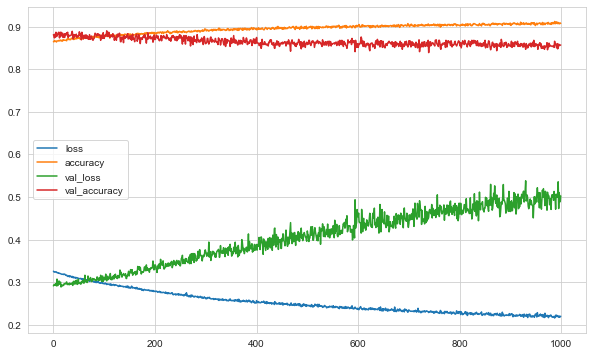

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6434226632118225
accuracy :  0.8119999766349792


In [61]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[720  76]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       796
           1       0.55      0.45      0.49       204

    accuracy                           0.81      1000
   macro avg       0.71      0.68      0.69      1000
weighted avg       0.80      0.81      0.80      1000



## GridSearchCV

In [66]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [67]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [68]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [69]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
127/127 [==============================] - 1s 3ms/step - loss: 0.4916 - accuracy: 0.7900 - val_loss: 0.4367 - val_accuracy: 0.8000
Epoch 2/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8053 - val_loss: 0.3941 - val_accuracy: 0.8300
Epoch 3/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8281 - val_loss: 0.3446 - val_accuracy: 0.8678
Epoch 4/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8416 - val_loss: 0.3290 - val_accuracy: 0.8656
Epoch 5/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8488 - val_loss: 0.3244 - val_accuracy: 0.8711
Epoch 6/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8517 - val_loss: 0.3127 - val_accuracy: 0.8722
Epoch 7/200
127/127 [==============================] - 0s 2ms/step - loss: 0.35

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000020BF73931C0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [70]:
grid_model.best_score_

0.860111111111111

In [71]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

In [72]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
19,0.860,0.011,1,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
16,0.860,0.014,2,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
3,0.859,0.011,3,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
15,0.859,0.013,4,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
8,0.859,0.011,5,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
5,0.859,0.011,6,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
23,0.858,0.010,7,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
1,0.858,0.010,8,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
0,0.858,0.011,9,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
11,0.858,0.009,10,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."


In [73]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[765  31]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.76      0.48      0.59       204

    accuracy                           0.86      1000
   macro avg       0.82      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 2ms/step


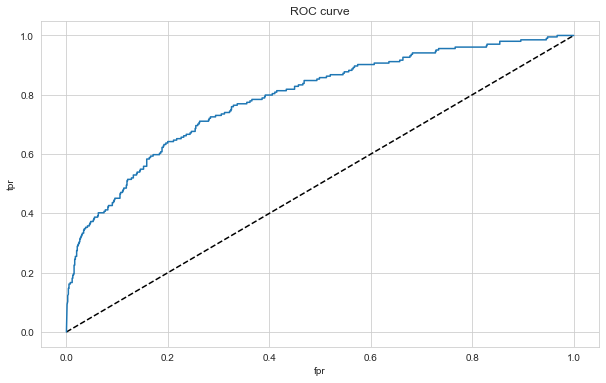

In [74]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Final Model and Model Deployment

In [95]:
import pickle
pickle.dump(scaler, open("project_scaler", 'wb'))

In [76]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [77]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [78]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.5063 - accuracy: 0.7878 - val_loss: 0.4633 - val_accuracy: 0.7960
Epoch 2/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.7991 - val_loss: 0.4436 - val_accuracy: 0.8090
Epoch 3/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4301 - accuracy: 0.8117 - val_loss: 0.4255 - val_accuracy: 0.8180
Epoch 4/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4102 - accuracy: 0.8249 - val_loss: 0.4214 - val_accuracy: 0.8200
Epoch 5/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.3909 - accuracy: 0.8364 - val_loss: 0.3901 - val_accuracy: 0.8400
Epoch 6/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.3748 - accuracy: 0.8441 - val_loss: 0.3710 - val_accuracy: 0.8470
Epoch 7/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8507 - val_loss: 0.3642 - val_accuracy:

<AxesSubplot:>

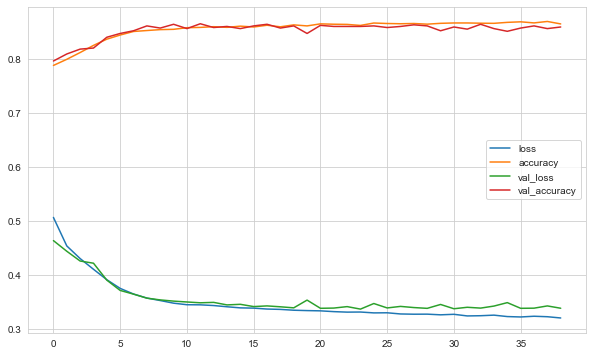

In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [80]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3364375829696655
accuracy :  0.8600000143051147


In [81]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[763  33]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [82]:
model.save('project_model.h5')

## Prediction

In [97]:
from tensorflow.keras.models import load_model

In [98]:
project_model = load_model('project_model.h5')
project_scaler = pickle.load(open("project_scaler", "rb"))

In [99]:
model_predict = df.drop('Exited', axis = 1).iloc[0:1, :]
model_predict

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.000,1,1,1,101348.880,0,0,0


In [100]:
model_predict = project_scaler.transform(model_predict)
model_predict

array([[0.        , 0.538     , 0.32432432, 0.2       , 0.        ,
        0.        , 1.        , 1.        , 0.50673489, 0.        ,
        0.        , 0.        ]])

In [101]:
(project_model.predict(model_predict) > 0.5).astype("int32")

1/1 [==============================] - 0s 56ms/step


array([[0]])

In [102]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___